In [ ]:
import pandas as pd
import numpy as np

#Parte grafica
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff 

#Parte Machine Learning - Regresión
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
data = pd.read_csv('top50.csv', encoding = 'ISO-8859-1') 
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
data.shape

(50, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [ ]:
data.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [ ]:
data.isna().sum().sort_values(ascending = False)

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

#**Gráficos**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [ ]:
#Vemos un distribucion normal de las caracteristicas que hay entre 4 variables con plotly express

fig = ff.create_distplot([data['Energy'], data['Popularity'], data['Danceability'], data['Liveness']],
                                          ['energy', 'popularity', 'danceability', 'liveness'], bin_size = 1.5)

fig.update_layout(title = 'Normal Distribution in their characterics', xaxis_title = 'Property Values')
fig.show()


#### **¿Existe algún artista que tiene más de una canción que sea popular?**

In [ ]:
num_song_artist = data.groupby('Artist.Name')['Track.Name'].agg(len)

fig = px.bar(num_song_artist, text = num_song_artist, color = num_song_artist,
             color_continuous_scale = px.colors.diverging.Portland)

fig.update_layout(title = 'Artist Name vs. Number of songs', xaxis_title = 'Artist Name', yaxis_title = 'Number of songs')
fig.show()

#### **Vemos a nivel porcentual cuantas canciones son de Ed Sheeran** 


In [ ]:
artist = list(data['Artist.Name'].value_counts().index)

fig = px.pie(num_song_artist, values = num_song_artist, names = sorted(artist), 
             color_discrete_sequence = px.colors.cyclical.IceFire,
             title = 'Artist Name %')
fig.show()

#### **¿Cúal es el género que mas le agrada a las personas?** 


In [ ]:
num_song_genre = data.groupby('Genre')['Track.Name'].agg(len)

fig = px.bar(num_song_genre, text = num_song_genre, color = num_song_genre,
             color_continuous_scale = px.colors.diverging.Portland)

fig.update_layout(title = 'Songs by Genre', xaxis_title = 'Genre', yaxis_title = 'Number of songs')
fig.show()

In [ ]:
#Usamos Seaborn para unir unas columna con otra y obtener una correlacion entre esas columnas

z = data.corr() #seria como la matri
x = list(data.columns[3:])

y = x

fig = px.imshow(z, x = x, y = x, title = 'Relation among columns',
                color_continuous_scale = px.colors.diverging.Portland)

fig.show()

<ipython-input-14-96a6551176a9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: title={'center': 'Correlation heatmap'}>

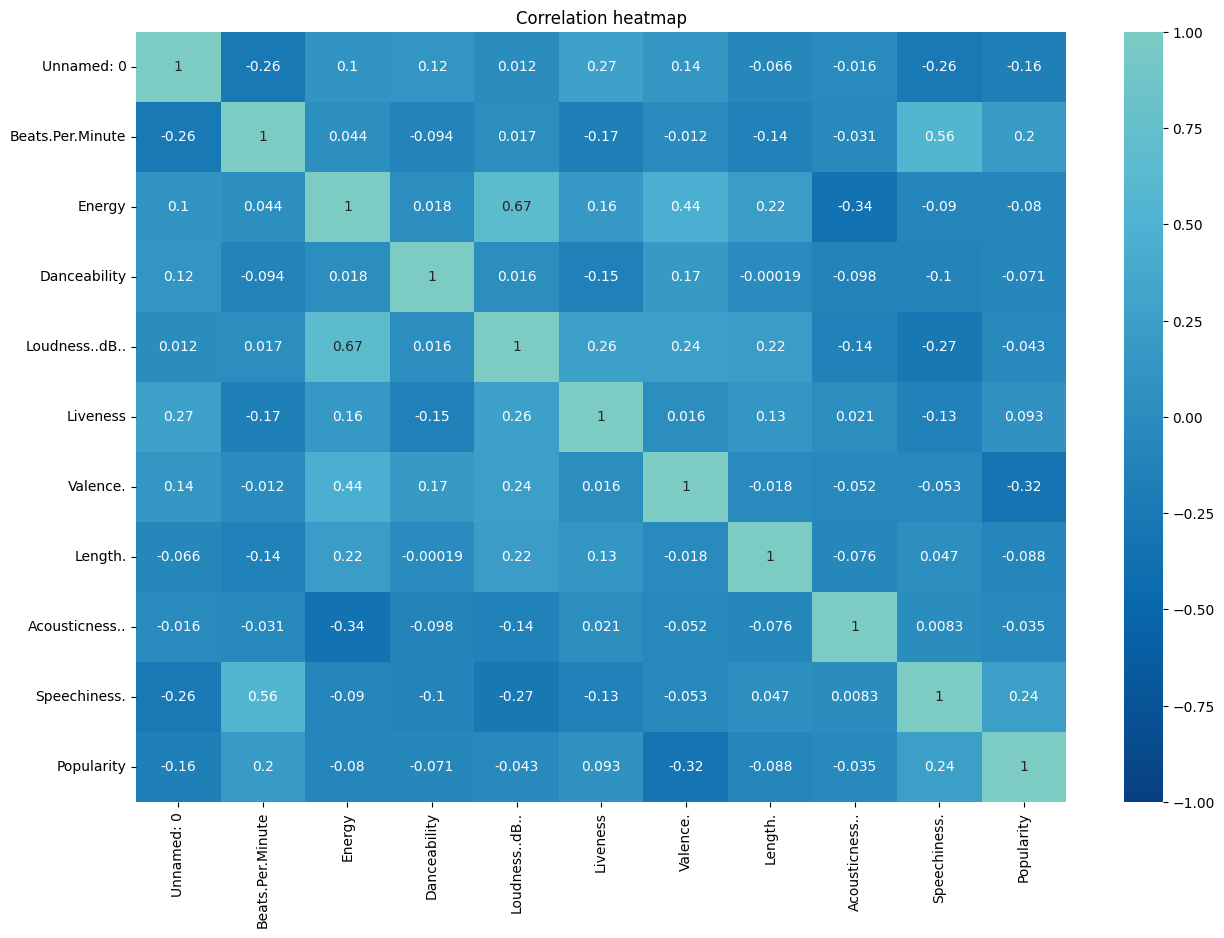

In [ ]:
#Usamos Seaborn para ver la correlación entre las columnas...

plt.figure(figsize = (15, 10))
plt.title('Correlation heatmap')

sns.heatmap(z, annot = True, vmin = -1, vmax = 1, cmap = ('GnBu_r'), center = 1) 

#### **¿Cúales son los géneros más populares?**

In [ ]:
fig = px.sunburst(data, path = ['Genre', 'Artist.Name', 'Track.Name'], values = 'Energy',
                  color_discrete_sequence= px.colors.cyclical.IceFire, title = 'Music energy by genre and artist')

fig.show()

#### **Análisis de información más centrada**



In [ ]:
fig = px.scatter(data, x = 'Energy', y = 'Loudness..dB..', marginal_y = 'violin', marginal_x = 'box', 
                 trendline = 'ols', template = 'simple_white')

fig.update_layout(title = 'Energy vs Loudness', xaxis_title = 'Energy', yaxis_title = 'Loudness')
fig.show()

# **MACHINE LEARNING**

In [ ]:
#Localizo la información que quiero utilizar en ML

X = data.loc[:, ['Energy', 'Danceability', 'Loudness..dB..', 'Length.', 'Acousticness..', 'Popularity']]

In [ ]:
##Creamos una única funcion para construir modelos y entrenarlos de acuerdo a nuestras preferencias.

def build_train_model(data, target_name, reg_fn):
  X = data.drop(target_name, axis = 1)
  y = data[target_name]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

  #Escalamiento de los datos(standarScaler)
  sc = StandardScaler()

  sc.fit(X_train) 
  X_train = sc.transform(X_train)
  X_test = sc.transform(X_test) 

  #Creación del modelo.
  model = reg_fn(X_train, y_train)
  score = model.score(X_train, y_train)
  print(f'Testing Score: {score}')

  #Agregamos la predicción
  y_pred = model.predict(X_test)

  #Calculo el rScore (rcuadrada)
  r_score = r2_score(y_test, y_pred)
  print(f'R2 Score: {r_score}')

  return {'model': model, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_pred': y_pred}


**Probamos 6 modelos de ML para analizar cual se ajusta más a nuestros objetivos**

In [ ]:
#Primer modelo de RL

def linear_model(X_train, y_train):
  print('Linear Regression')
  linear_regression = LinearRegression()
  linear_regression.fit(X_train, y_train)
  return linear_regression

In [ ]:
#Segundo modelo de Regresión Lasso

def lasso_model(X_train, y_train):
  print('Lasso Regression')
  lasso_regression = Lasso(alpha = 0.8, max_iter = 1000)
  lasso_regression.fit(X_train, y_train)
  return lasso_regression


In [ ]:
#Tercer modelo de Regresión Ridge

def ridge_model(X_train, y_train):
  print('Ridge Regression')
  ridge_regression = Ridge(alpha = 0.9)
  ridge_regression.fit(X_train, y_train)
  return ridge_regression

In [ ]:
#Cuarto modelo Support Vector Machine

def svr_model(X_train, y_train):
  print('SVR')
  svr = SVR()
  svr.fit(X_train, y_train)
  return svr

In [ ]:
#Quinto modelo Decision Tree Regressor

def tree_model(X_train, y_train):
  print('Decission Tree Regressor')
  tree_dec = DecisionTreeRegressor(max_depth = 15)
  tree_dec.fit(X_train, y_train)
  return tree_dec

In [ ]:
#Sexto modelo Random Forest Regressor

def forest_model(X_train, y_train):
  print('Random Forest Regressor')
  random_for = RandomForestRegressor(n_estimators = 300, max_depth = 8)
  random_for.fit(X_train, y_train)
  return random_for

**Como tenemos todas las funciones construidas vamos a crear una variable linear que toma el valor de la funcion creada (build_train_model) y vamos a pasar argumentos a los parámetros (primero la lista con las columnas seleccionadas, luego la copia del campo de popularidad y por ultimo el modelo que hayamos seleccionado de los implementados**

In [ ]:
linear = build_train_model(X, 'Popularity', linear_model)

Linear Regression
Testing Score: 0.12055132411602199
R2 Score: -0.561271277199024


In [ ]:
lasso = build_train_model(X, 'Popularity', lasso_model)

Lasso Regression
Testing Score: 0.028439874166623635
R2 Score: -0.1847229390222398


In [ ]:
ridge = build_train_model(X, 'Popularity', ridge_model)

Ridge Regression
Testing Score: 0.12025401442818062
R2 Score: -0.5393410683046207


In [ ]:
svr = build_train_model(X, 'Popularity', svr_model)

SVR
Testing Score: 0.07109201954456346
R2 Score: -0.2508138824676758


In [ ]:
tree_model = build_train_model(X, 'Popularity', tree_model)

Decission Tree Regressor
Testing Score: 1.0
R2 Score: -0.4227066817667038


In [ ]:
forest_model = build_train_model(X, 'Popularity', forest_model)

Random Forest Regressor
Testing Score: 0.7987955140244932
R2 Score: -0.08843022636851483


### **Tomando como ejemplo el modelo del árbol de decisión observamos los resultados arrojados por el modelo.**


In [ ]:
tree_model_output = pd.DataFrame({'Actual': tree_model['y_test'], 'Predicted': tree_model['y_pred']})
print(tree_model_output)

    Actual  Predicted
13      87       92.0
39      78       87.0
30      84       91.0
45      88       86.0
17      91       88.0
48      88       82.0
26      83       87.0
25      70       87.0
32      89       80.0
19      91       90.0
12      88       88.0
4       94       88.0
37      87       90.0
8       87       90.0
3       86       91.0


In [ ]:
r2_score(tree_model_output['Actual'], tree_model_output['Predicted'])

-0.4227066817667038